# Start Up:

In [ ]:
#If using google colab:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/GDFT-Net/')

In [1]:
# Imports
from Core import GDFT_Data
from Core import GDFT_Net
from Core import GDFT_Tester
import numpy as np
import matplotlib.pyplot as plt

Data Version: 1.61
Net Version: 1.72
Tester Version: 1.02


# Graphical Analysis

In [5]:
x,y= 256,64 # Net Dimensions
Net_Path = "Saved_Models/Saved_Nets/GDFT_Net({0}x{1}).h5".format(x,y)
Net = GDFT_Net.load_GDFT_Net(Net_Path)

Network RMSE: 1.5 Wavelengths
Variation: 8.7 Wavelengths


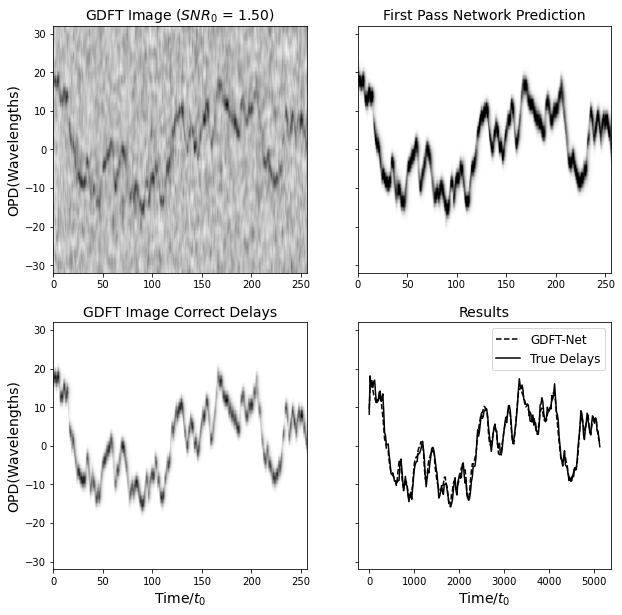

In [6]:
Net.plot_random_Example(SNR=1.5)

# Numerical Analysis:

## Running tests on testing data set:

In [6]:
x,y = 256,64
Tester_Path= "Saved_Results/Testers/Tester({0}x{1}).pkl".format(x,y)
tester=GDFT_Tester.GDFT_Net_Tester(Tester_Path,Net.path,(x,y))
tester.load_Net()
print(tester.version)

DS = GDFT_Data.load_Data_Set("Saved_Data/Test_Data/TEST(V3.0)x: {0}.pkl".format(x))
tester.run_RMSE_Testing(DS=DS)

tester.Path = "Saved_Results/Testers/Tester(V3.0)({0}x{1}).pkl".format(x,y)
tester.save_data_to_file("Saved_Results/Results(V3.0)({0}x{1})".format(x,y))
tester.save()

1.1
SNR: 0.10 RMSE: 8.25 STD: 1.30
SNR: 0.20 RMSE: 8.17 STD: 1.25
SNR: 0.30 RMSE: 8.13 STD: 1.29
SNR: 0.40 RMSE: 7.99 STD: 1.39
SNR: 0.50 RMSE: 7.61 STD: 1.43
SNR: 0.60 RMSE: 7.11 STD: 1.48
SNR: 0.70 RMSE: 6.18 STD: 1.59
SNR: 0.80 RMSE: 4.78 STD: 1.45
SNR: 0.90 RMSE: 3.50 STD: 1.22
SNR: 1.00 RMSE: 2.54 STD: 1.02
SNR: 1.10 RMSE: 1.93 STD: 0.48
SNR: 1.20 RMSE: 1.64 STD: 0.36
SNR: 1.30 RMSE: 1.47 STD: 0.21
SNR: 1.40 RMSE: 1.40 STD: 0.19
SNR: 1.50 RMSE: 1.36 STD: 0.17
SNR: 1.60 RMSE: 1.32 STD: 0.14
SNR: 1.70 RMSE: 1.30 STD: 0.15
SNR: 1.80 RMSE: 1.28 STD: 0.13
SNR: 1.90 RMSE: 1.30 STD: 0.17
SNR: 2.00 RMSE: 1.29 STD: 0.26
Reload Net


## Ploting Results from Specific Net:

In [2]:
# Load Tester of desired Net
x,y = 64,64
path = "Saved_Results/Testers/Tester(V3.0)({0}x{1}).pkl".format(x,y)
tester = GDFT_Tester.load_tester(path)


In [4]:
tester.dimensions=(64,64)
tester.save()

Reload Net


### Standard RMSE Data


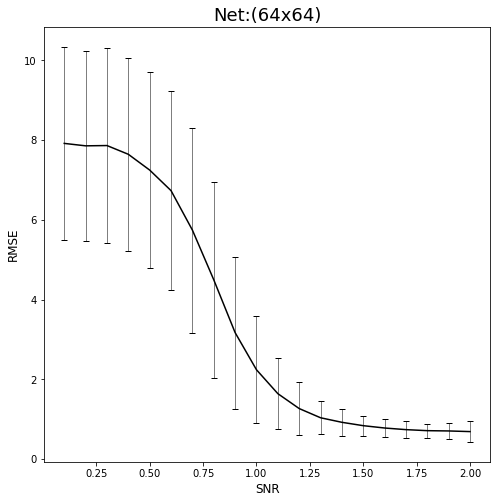

In [3]:
SNRs,means,stds = tester.get_RMSE_Data()
tester.plot_this_data(SNRs,means,stds,title="Net:({0}x{1})".format(x,y))

### Mean Error at Specified Index


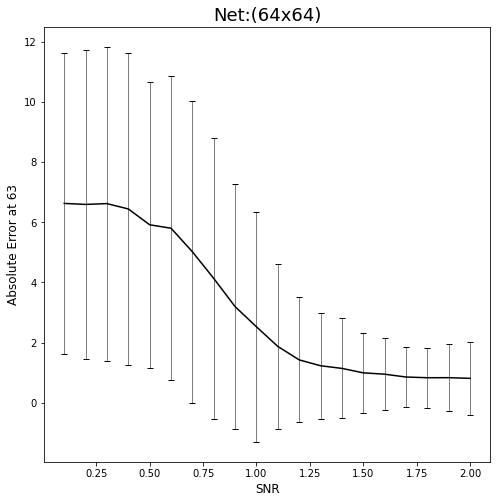

In [4]:
i = 63
SNRs,means,stds = tester.get_error_at_index(i)
tester.plot_this_data(SNRs,means,stds,title="Net:({0}x{1})".format(x,y),ylabel="Absolute Error at {0}".format(i))

### Mean Error over all Indeces at specific SNR

Clear here that error is largest towards the beggining and end of frame.
This is as expected: less information is availible here to interpolate from. Shows that network is not using historical information as such, but rather "adjacent" information to improve predictions. 

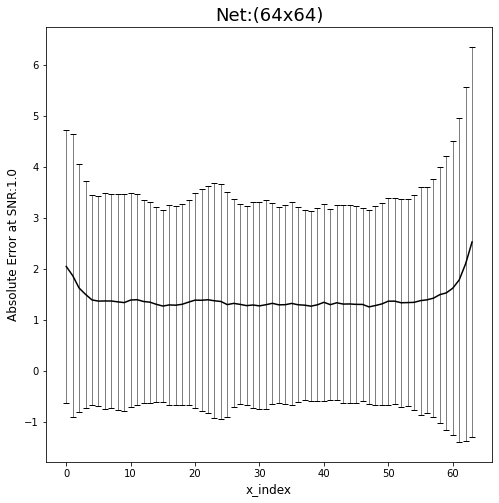

In [5]:
#tester.load_Net()
SNR=1.0
SNRs,means,stds = tester.get_error_variation_at_SNR(SNR)
tester.plot_this_data(SNRs,means,stds,title="Net:({0}x{1})".format(x,y),xlabel="x_index",ylabel="Absolute Error at SNR:{0}".format(SNR))

### Maximum Error per frame over SNR



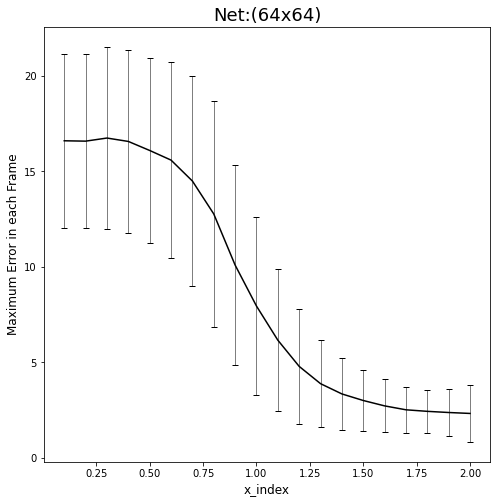

In [7]:
SNRs,means,stds = tester.get_max_error()
tester.plot_this_data(SNRs,means,stds,title="Net:({0}x{1})".format(x,y),xlabel="x_index",ylabel="Maximum Error in each Frame".format(SNR))

# Comparing Nets of Different Dimensions

## Standard RMSE Comparison without accounting for differing RMSE sample sizes:

Text(0, 0.5, 'RMSE ($\\lambda_0$)')

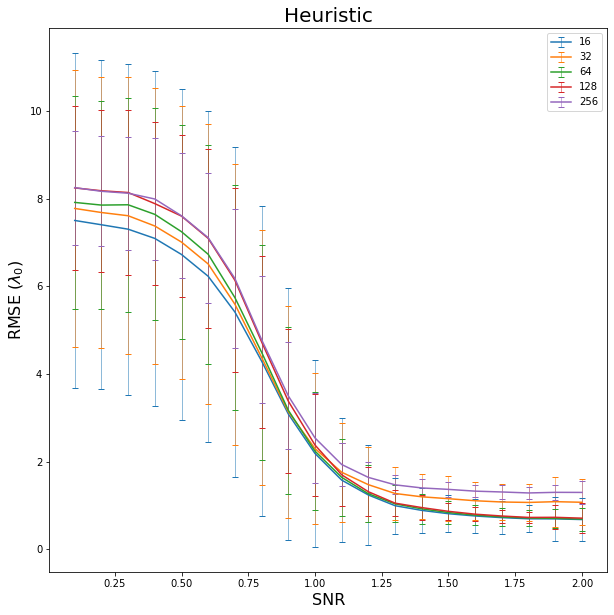

In [4]:
plt.figure(figsize=(10,10))
corr=1

for x in [16,32,64,128,256]:
    Tester_Path= "Saved_Results/Testers/Tester(V3.0)({0}x{1}).pkl".format(x,64)
    tester=GDFT_Tester.load_tester(Tester_Path)
    means=[]
    stds=[]
    SNRs = []
    for SNR in sorted(tester.errors.keys()):
        SNRs.append(SNR)
        errors = np.array(tester.errors[SNR]) 
        rmses = np.sqrt(np.mean((errors**2),axis=1))
        means.append(np.mean(rmses))
        stds.append(np.std(rmses))
    plt.errorbar(SNRs,means,yerr=stds,capsize=3,elinewidth=0.5,label=x) 


plt.legend()
plt.xlabel("SNR",fontsize=16)
plt.title("Heuristic",fontsize=20)
plt.ylabel(r"RMSE ($\lambda_0$)",fontsize=16)

Now calculate RMSE over an identical window (x=64) for all networks

Text(0, 0.5, 'RMSE ($\\lambda_0$)')

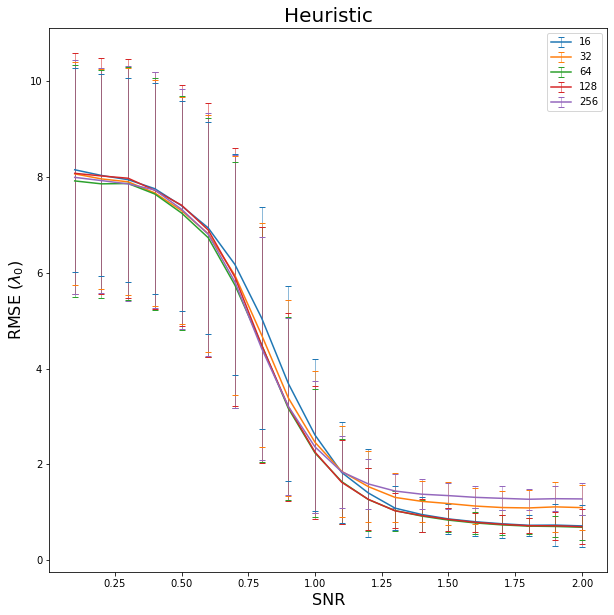

In [3]:
plt.figure(figsize=(10,10))
corr=1

for x in [16,32,64,128,256]:
    Tester_Path= "Saved_Results/Testers/Tester(V3.0)({0}x{1}).pkl".format(x,64)
    tester=GDFT_Tester.load_tester(Tester_Path)
    means=[]
    stds=[]
    SNRs = []
    for SNR in sorted(tester.errors.keys()):
        SNRs.append(SNR)
        errors = np.array(tester.errors[SNR]).reshape((2000,64)) #Reshape data such that RMSE is always calculated over 64 values
        rmses = np.sqrt(np.mean((errors**2),axis=1))
        means.append(np.mean(rmses))
        stds.append(np.std(rmses))
    plt.errorbar(SNRs,means,yerr=stds,capsize=3,elinewidth=0.5,label=x) 


plt.legend()
plt.xlabel("SNR",fontsize=16)
plt.title("Heuristic",fontsize=20)
plt.ylabel(r"RMSE ($\lambda_0$)",fontsize=16)

Note RMSEs and their associated standard deviation (error bars) are now identical. Note: I'm not sure whats happening above SNR=1.0 but I don't think its significant. Seems to be some issue with the training process. 

## Some other Miscallaneous plots that might or might not be of interest

### Average error per pixel over width of frame between networks at a given SNR

Text(0, 0.5, 'Error ($\\lambda_0$)')

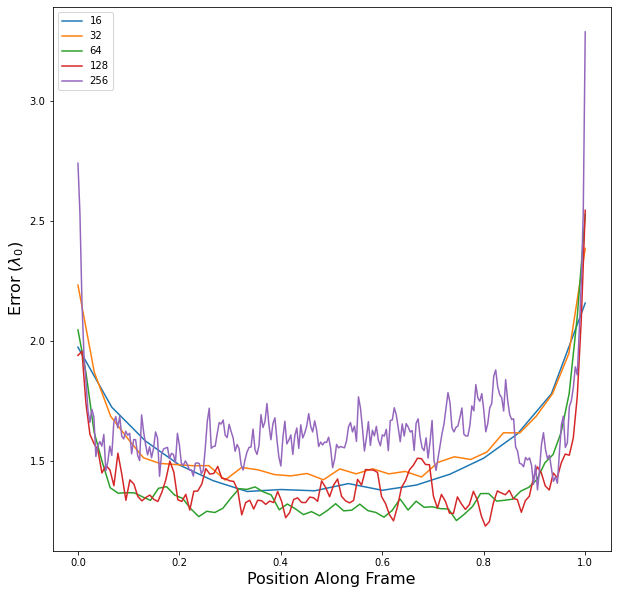

In [11]:
SNR = 1.0
plt.figure(figsize=(10,10))
corr=1
for x in [16,32,64,128,256]:
    Tester_Path= "Saved_Results/Testers/Tester(V3.0)({0}x{1}).pkl".format(x,64)
    tester=GDFT_Tester.load_tester(Tester_Path)
    inds,means,stds = tester.get_error_variation_at_SNR(SNR)
    x_frame= np.linspace(0.0,1.0,len(means))
    plt.plot(x_frame,means,label=x) 


plt.legend()
plt.xlabel("Position Along Frame",fontsize=16)

plt.ylabel(r"Error ($\lambda_0$)",fontsize=16)

----------
(20,)
(20,)
(20,)
----------
(20,)
(20,)
(20,)
----------
(20,)
(20,)
(20,)
----------
(20,)
(20,)
(20,)


Text(0, 0.5, 'RMSE ($\\lambda_0$)')

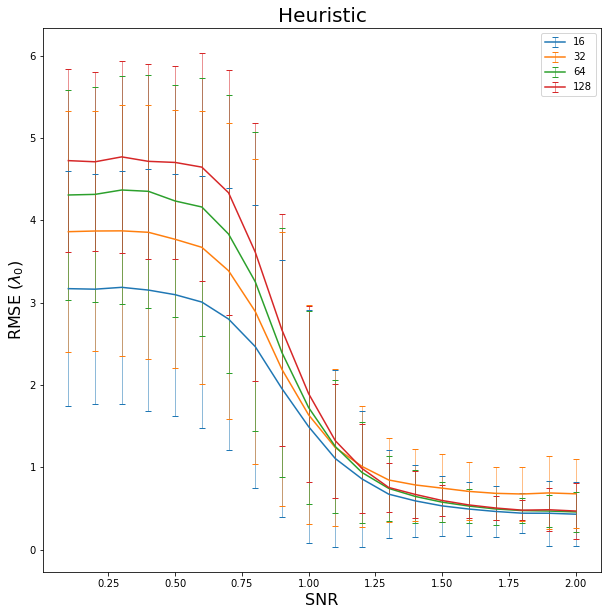

In [12]:
plt.figure(figsize=(10,10))
corr=1

for x in [16,32,64,128]:
    print("----------")
    Tester_Path= "Saved_Results/Testers/Tester(V3.0)({0}x{1}).pkl".format(x,64)
    tester=GDFT_Tester.load_tester(Tester_Path)
    stds=[]
    std_std=[]
    SNRs = []
    for SNR in sorted(tester.errors.keys()):
        SNRs.append(SNR)
        std = np.std(np.abs(tester.errors[SNR]),axis=1)
        stds.append(np.mean(std))
        std_std.append(np.std(std))
    plt.errorbar(SNRs,stds,yerr=std_std,capsize=3,elinewidth=0.5,label=x) 


plt.legend()
plt.xlabel("SNR",fontsize=16)
plt.title("Heuristic",fontsize=20)
plt.ylabel(r"RMSE ($\lambda_0$)",fontsize=16)

In [18]:
Tester_Path= "Saved_Results/Testers/Tester(V3.0)({0}x{1}).pkl".format(16,64)
tester=GDFT_Tester.load_tester(Tester_Path)
